1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
zp1 = zp.reshape((10,1))
zp1

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [4]:
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
ks1 = ks.reshape((10,1))
ks1

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [36]:
zp1 = np.hstack([np.ones((10,1)),zp1])
zp1

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [37]:
B = np.dot(np.linalg.inv(np.dot(zp1.T,zp1)),zp1.T@ks1)
B

array([[444.17735732],
       [  2.62053888]])

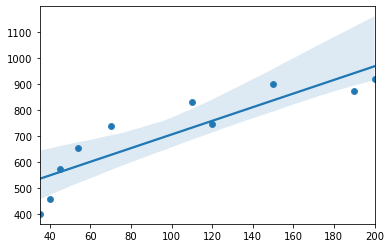

In [39]:
sns.scatterplot(zp, ks)
sns.regplot(zp, ks)

Почему-то intercept B0 на графике линейной регрессии отличается от расчетного???

In [74]:
b = (np.mean(zp*ks)-np.mean(zp)*np.mean(ks))/(np.mean(zp**2) - np.mean(zp)**2)
b

2.620538882402765

In [75]:
a = np.mean(ks)-b*np.mean(zp)
a

444.1773573243596

In [78]:
## без intercept
x = zp.reshape((10,1))
x

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [79]:
y = ks.reshape((10,1))
y

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [80]:
B = np.dot(np.linalg.inv(np.dot(x.T,x)),x.T@y)
B

array([[5.88982042]])

In [ ]:
y = 5.88982042 * X

2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [9]:
zp2 = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks2 = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [10]:
def mse(B1, y=ks2, x=zp2, n = 10):
    return np.sum((B1*x - y)**2)/n

##mse_p = (2/n)*np.sum((B1*x-y)*x)


In [11]:
B1 = 0.1
n=10
alpha = 1e-6
alpha

1e-06

In [12]:
for i in range(10):
    B1 -= alpha*(2/n)*np.sum((B1*zp2-ks2)*zp2)
    print ('B1= {}'.format(B1))

B1= 0.25952808
B1= 0.414660650906144
B1= 0.5655188230595969
B1= 0.7122203698240712
B1= 0.8548798195302346
B1= 0.9936085448867542
B1= 1.1285148499277806
B1= 1.2597040545647504
B1= 1.387278576808517
B1= 1.5113380127259965


In [20]:
B1 = 0.1
n=10
alpha = 1e-6

In [21]:
for i in range(300):
    B1 -= alpha*(2/n)*np.sum((B1*zp2-ks2)*zp2)
    if i%50 == 0:
        print ('Iteration:{i}, B1 ={B1}, mse = {mse}'.format(i=i, B1=B1, mse = mse(B1)))

Iteration:0, B1 =0.25952808, mse = 493237.7212546963
Iteration:50, B1 =4.497229618367758, mse = 83233.94472982832
Iteration:100, B1 =5.54537842245223, mse = 58151.31823171113
Iteration:150, B1 =5.804626485478126, mse = 56616.849068093856
Iteration:200, B1 =5.868748638669329, mse = 56522.97550129376
Iteration:250, B1 =5.884608547059329, mse = 56517.232638059555
